#### Deep Learning Jump Start with Azure Databricks

##### Problem Statement:
###### Build and Train a Deep Convolution Network to Classify Images in the CIFAR10 dataset using Keras on Azure Databricks
<br>
##### The CIFAR-10 dataset:
The CIFAR-10 dataset consists of **60000 32x32** colour images in **10 classes**, with **6000** images per class. There are **50000** training images and **10000** test images. 
<br>
###### Image Classes Example
<img src="https://github.com/AbidGuroo/DeepLearningJumpstart/blob/master/media/CIFAR10.png?raw=true" alt="CIFAR10" width="400"/>

<br>

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="Keras" width="200"/>
##### **Keras** is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
* In this Technical Lab we will use Tensorflow as the backend for Keras

Keras is one of the leading frameworks to build deep learning models, It

1. Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2. Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3. Runs seamlessly on CPU and GPU.

##### Step 1 - Library Import & general setup
* Keras
* Keras Preprocessing
* Keras Models
* Keras Layers
* Matplotlib

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

###### Validate GPU accessibility

In [5]:
# Test to Validate Tensorflow can access GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# Test to Validate Keras can access GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

###### Define Function to plot training metrics

In [7]:
def plotmetrics(history):
  width = 10
  height = 5
  plt.figure(figsize=(width, height))
  # Plot training & validation accuracy values
  plt.title('Model Metrics : Non Augmented Data')
  plt.subplot(1, 2, 1)
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  pltoutput = plt.show()
  return pltoutput

###### Initial Parameter Setup

In [9]:
batch_size = 32
num_classes = 10
epochs = 25

##### Step 2 - Load and process CIFAR 10 Dataset

In [11]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Downloading data from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

 8192/170498071 [..............................] - ETA: 9:59
 106496/170498071 [..............................] - ETA: 2:23
 434176/170498071 [..............................] - ETA: 58s 
 1040384/170498071 [..............................] - ETA: 34s
 1744896/170498071 [..............................] - ETA: 26s
 2957312/170498071 [..............................] - ETA: 18s
 3678208/170498071 [..............................] - ETA: 17s
 4251648/170498071 [..............................] - ETA: 17s
 4546560/170498071 [..............................] - ETA: 18s
 5185536/170498071 [..............................] - ETA: 17s
 5595136/170498071 [..............................] - ETA: 18s
 6021120/170498071 [>.............................] - ETA: 18s
 6447104/170498071 [>.............................] - ETA: 18s
 6856704/170498071 [>.............................] - ETA: 18s
 7266304/170498071 [>.............................] - ETA: 19s
 7692288/170498071 [>.............................] - ETA: 19s
 8134656/170498071 [>.............................] - ETA: 19s
 8577024/170498071 [>.............................] - ETA: 19s
 9019392/170498071 [>.............................] - ETA: 19s
 9461760/170498071 [>.............................] - ETA: 19s
 9904128/170498071 [>.............................] - ETA: 19s
 10346496/170498071 [>.............................] - ETA: 19s
 10805248/170498071 [>.............................] - ETA: 19s
 11067392/170498071 [>.............................] - ETA: 20s
 11526144/170498071 [=>............................] - ETA: 19s
 11853824/170498071 [=>............................] - ETA: 20s
 12181504/170498071 [=>............................] - ETA: 20s
 12509184/170498071 [=>............................] - ETA: 20s
 12836864/170498071 [=>............................] - ETA: 20s
 13164544/170498071 [=>............................] - ETA: 20s
 13492224/170498071 [=>............................] - ETA: 20s
 13836288/170498071 [=>............................] - ETA: 20s
 14163968/170498071 [=>............................] - ETA: 21s
 14508032/170498071 [=>............................] - ETA: 21s
 14852096/170498071 [=>............................] - ETA: 21s
 15196160/170498071 [=>............................] - ETA: 21s
 15556608/170498071 [=>............................] - ETA: 21s
 15917056/170498071 [=>............................] - ETA: 21s
 16261120/170498071 [=>............................] - ETA: 21s
 16621568/170498071 [=>............................] - ETA: 21s
 16982016/170498071 [=>............................] - ETA: 21s
 17342464/170498071 [==>...........................] - ETA: 21s
 17702912/170498071 [==>...........................] - ETA: 21s
 18079744/170498071 [==>...........................] - ETA: 21s
 18456576/170498071 [==>...........................] - ETA: 21s
 18817024/170498071 [==>...........................] - ETA: 21s
 19193856/170498071 [==>...........................] - ETA: 21s
 19570688/170498071 [==>...........................] - ETA: 21s
 19947520/170498071 [==>...........................] - ETA: 21s
 20324352/170498071 [==>...........................] - ETA: 21s
 20717568/170498071 [==>...........................] - ETA: 21s
 21094400/170498071 [==>...........................] - ETA: 21s
 21356544/170498071 [==>...........................] - ETA: 21s
 21733376/170498071 [==>...........................] - ETA: 21s
 22028288/170498071 [==>...........................] - ETA: 21s
 22454272/170498071 [==>...........................] - ETA: 21s
 22732800/170498071 [==>...........................] - ETA: 21s
 23027712/170498071 [===>..........................] - ETA: 21s
 23322624/170498071 [===>..........................] - ETA: 21s
 23617536/170498071 [===>..........................] - ETA: 21s
 23896064/170498071 [===>..........................] - ETA: 21s
 24109056/170498071 [===>...............

In [12]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

##### Step 3 - Define Convolution Network

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [15]:
model.summary()

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
conv2d_1 (Conv2D) (None, 32, 32, 32) 896 
_________________________________________________________________
activation_1 (Activation) (None, 32, 32, 32) 0 
_________________________________________________________________
conv2d_2 (Conv2D) (None, 30, 30, 32) 9248 
_________________________________________________________________
activation_2 (Activation) (None, 30, 30, 32) 0 
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32) 0 
_________________________________________________________________
dropout_1 (Dropout) (None, 15, 15, 32) 0 
_________________________________________________________________
conv2d_3 (Conv2D) (None, 15, 15, 64) 18496 
_________________________________________________________________
activation_3 (Activation) (None, 15, 15, 64) 0 
_________________________________________________________________
conv2d_4 (Conv2D) (None, 13, 13, 64) 36928 
_________________________________________________________________
activation_4 (Activation) (None, 13, 13, 64) 0 
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64) 0 
_________________________________________________________________
dropout_2 (Dropout) (None, 6, 6, 64) 0 
_________________________________________________________________
flatten_1 (Flatten) (None, 2304) 0 
_________________________________________________________________
dense_1 (Dense) (None, 512) 1180160 
_________________________________________________________________
activation_5 (Activation) (None, 512) 0 
_________________________________________________________________
dropout_3 (Dropout) (None, 512) 0 
_________________________________________________________________
dense_2 (Dense) (None, 10) 5130 
_________________________________________________________________
activation_6 (Activation) (None, 10) 0 
=================================================================
Total params: 1,250,858
Trainable params: 1,250,858
Non-trainable params: 0
_________________________________________________________________

##### Step 4 - Define Optimizers and Compile the model

In [17]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

##### Step 5 - Model Training : without Data Augmentation (Takes 5-8 Mins)

In [19]:
from keras.callbacks import History 
history = History()
print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
         callbacks=[history],
         verbose=1)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25

 32/50000 [..............................] - ETA: 29:28 - loss: 2.3220 - acc: 0.1562
 160/50000 [..............................] - ETA: 6:08 - loss: 2.3201 - acc: 0.1187 
 288/50000 [..............................] - ETA: 3:33 - loss: 2.3150 - acc: 0.1076
 416/50000 [..............................] - ETA: 2:33 - loss: 2.3123 - acc: 0.1202
 576/50000 [..............................] - ETA: 1:55 - loss: 2.3082 - acc: 0.1198
 736/50000 [..............................] - ETA: 1:33 - loss: 2.3034 - acc: 0.1236
 896/50000 [..............................] - ETA: 1:20 - loss: 2.3043 - acc: 0.1172
 1056/50000 [..............................] - ETA: 1:10 - loss: 2.3036 - acc: 0.1127
 1216/50000 [..............................] - ETA: 1:02 - loss: 2.3041 - acc: 0.1118
 1376/50000 [..............................] - ETA: 57s - loss: 2.3041 - acc: 0.1083 
 1536/50000 [..............................] - ETA: 53s - loss: 2.3021 - acc: 0.1094
 1696/50000 [>.............................] - ETA: 49s - loss: 2.3012 - acc: 0.1085
 1856/50000 [>.............................] - ETA: 46s - loss: 2.3007 - acc: 0.1083
 2048/50000 [>.............................] - ETA: 43s - loss: 2.3003 - acc: 0.1108
 2240/50000 [>.............................] - ETA: 40s - loss: 2.2986 - acc: 0.1147
 2432/50000 [>.............................] - ETA: 38s - loss: 2.2961 - acc: 0.1176
 2624/50000 [>.............................] - ETA: 36s - loss: 2.2953 - acc: 0.1185
 2816/50000 [>.............................] - ETA: 34s - loss: 2.2925 - acc: 0.1222
 3008/50000 [>.............................] - ETA: 33s - loss: 2.2907 - acc: 0.1220
 3200/50000 [>.............................] - ETA: 32s - loss: 2.2881 - acc: 0.1263
 3392/50000 [=>............................] - ETA: 30s - loss: 2.2870 - acc: 0.1279
 3584/50000 [=>............................] - ETA: 29s - loss: 2.2840 - acc: 0.1311
 3776/50000 [=>............................] - ETA: 29s - loss: 2.2804 - acc: 0.1351
 3968/50000 [=>............................] - ETA: 28s - loss: 2.2763 - acc: 0.1379
 4160/50000 [=>............................] - ETA: 27s - loss: 2.2739 - acc: 0.1380
 4352/50000 [=>............................] - ETA: 26s - loss: 2.2684 - acc: 0.1409
 4544/50000 [=>............................] - ETA: 26s - loss: 2.2633 - acc: 0.1446
 4736/50000 [=>............................] - ETA: 25s - loss: 2.2588 - acc: 0.1480
 4928/50000 [=>............................] - ETA: 24s - loss: 2.2543 - acc: 0.1487
 5120/50000 [==>...........................] - ETA: 24s - loss: 2.2479 - acc: 0.1529
 5312/50000 [==>...........................] - ETA: 23s - loss: 2.2440 - acc: 0.1559
 5504/50000 [==>...........................] - ETA: 23s - loss: 2.2415 - acc: 0.1559
 5664/50000 [==>...........................] - ETA: 23s - loss: 2.2366 - acc: 0.1578
 5824/50000 [==>...........................] - ETA: 22s - loss: 2.2336 - acc: 0.1592
 6016/50000 [==>...........................] - ETA: 22s - loss: 2.2283 - acc: 0.1617
 6208/50000 [==>...........................] - ETA: 21s - loss: 2.2226 - acc: 0.1641
 6400/50000 [==>...........................] - ETA: 21s - loss: 2.2182 - acc: 0.1677
 6592/50000 [==>...........................] - ETA: 21s - loss: 2.2102 - acc: 0.1701
 6784/50000 [===>..........................] - ETA: 20s - loss: 2.2070 - acc: 0.1710
 6976/50000 [===>..........................] - ETA: 20s - loss: 2.2033 - acc: 0.1717
 7168/50000 [===>..........................] - ETA: 20s - loss: 2.1988 - acc: 0.1747
 7360/50000 [===>..........................] - ETA: 20s - loss: 2.1956 - acc: 0.1768
 7552/50000 [===>..........................] - ETA: 20s - loss: 2.1910 - acc: 0.1796
 7744/50000 [===>..........................] - ETA: 19s - loss: 2.1868 - acc: 0.1810
 7936/50000 [===>..........................] - ETA: 19s - loss: 2.1834 - acc: 0.1821
 8128/50000 [===>..........................] - ETA: 19s - loss: 2.1806 - acc: 0.

###### Evaluate the model (to Get final test accuracy and loss)

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.7582
Test loss: 0.7188108211517334

##### Visualize Model metrics

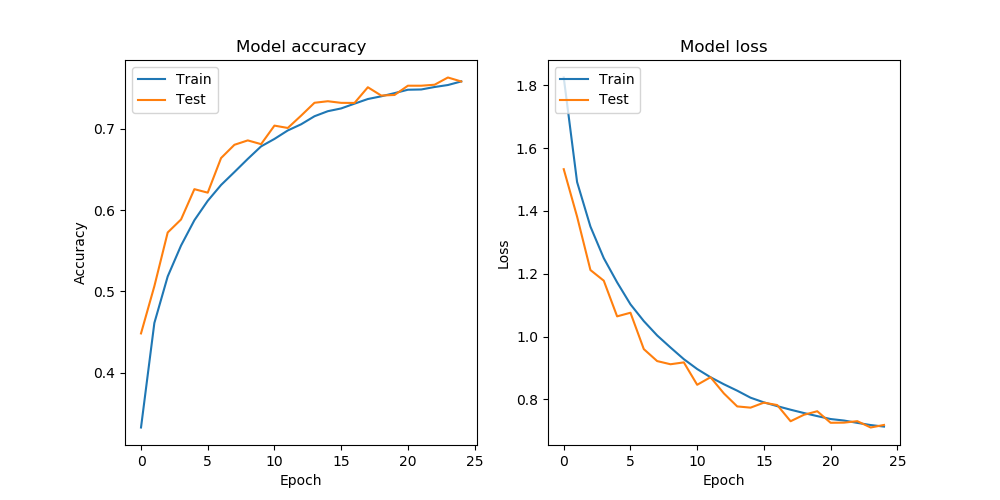

In [23]:
pltoutput = plotmetrics(history)
display(pltoutput)

##### Step 6 - Model Training with Data Augmentation (Takes 5-10 Minutes)

In [25]:
from keras.callbacks import History 
history = History()
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                     callbacks=[history],
                   verbose =1)

Using real-time data augmentation.
Epoch 1/25

 1/1562 [..............................] - ETA: 39s - loss: 1.5020 - acc: 0.4688
 6/1562 [..............................] - ETA: 21s - loss: 0.8996 - acc: 0.6927
 11/1562 [..............................] - ETA: 19s - loss: 0.9296 - acc: 0.6847
 16/1562 [..............................] - ETA: 18s - loss: 0.8952 - acc: 0.7051
 21/1562 [..............................] - ETA: 18s - loss: 0.8776 - acc: 0.7024
 26/1562 [..............................] - ETA: 18s - loss: 0.8935 - acc: 0.6995
 31/1562 [..............................] - ETA: 18s - loss: 0.9056 - acc: 0.6925
 36/1562 [..............................] - ETA: 18s - loss: 0.8985 - acc: 0.6944
 41/1562 [..............................] - ETA: 18s - loss: 0.8957 - acc: 0.6966
 46/1562 [..............................] - ETA: 17s - loss: 0.8875 - acc: 0.6977
 51/1562 [..............................] - ETA: 17s - loss: 0.8889 - acc: 0.6985
 56/1562 [>.............................] - ETA: 17s - loss: 0.8919 - acc: 0.6942
 61/1562 [>.............................] - ETA: 17s - loss: 0.8896 - acc: 0.6957
 66/1562 [>.............................] - ETA: 17s - loss: 0.8900 - acc: 0.6960
 71/1562 [>.............................] - ETA: 17s - loss: 0.8969 - acc: 0.6923
 76/1562 [>.............................] - ETA: 17s - loss: 0.8998 - acc: 0.6924
 81/1562 [>.............................] - ETA: 17s - loss: 0.8935 - acc: 0.6952
 86/1562 [>.............................] - ETA: 17s - loss: 0.8924 - acc: 0.6973
 91/1562 [>.............................] - ETA: 17s - loss: 0.8904 - acc: 0.6961
 96/1562 [>.............................] - ETA: 16s - loss: 0.8916 - acc: 0.6930
 101/1562 [>.............................] - ETA: 16s - loss: 0.8858 - acc: 0.6962
 106/1562 [=>............................] - ETA: 16s - loss: 0.8846 - acc: 0.6969
 111/1562 [=>............................] - ETA: 16s - loss: 0.8894 - acc: 0.6968
 116/1562 [=>............................] - ETA: 16s - loss: 0.8863 - acc: 0.6983
 121/1562 [=>............................] - ETA: 16s - loss: 0.8906 - acc: 0.6963
 126/1562 [=>............................] - ETA: 16s - loss: 0.8934 - acc: 0.6959
 131/1562 [=>............................] - ETA: 16s - loss: 0.8929 - acc: 0.6985
 136/1562 [=>............................] - ETA: 16s - loss: 0.8897 - acc: 0.6994
 141/1562 [=>............................] - ETA: 16s - loss: 0.8938 - acc: 0.6984
 146/1562 [=>............................] - ETA: 16s - loss: 0.9028 - acc: 0.6952
 151/1562 [=>............................] - ETA: 16s - loss: 0.9003 - acc: 0.6962
 156/1562 [=>............................] - ETA: 16s - loss: 0.9028 - acc: 0.6965
 161/1562 [==>...........................] - ETA: 16s - loss: 0.9015 - acc: 0.6970
 166/1562 [==>...........................] - ETA: 16s - loss: 0.8976 - acc: 0.6975
 171/1562 [==>...........................] - ETA: 15s - loss: 0.9000 - acc: 0.6965
 176/1562 [==>...........................] - ETA: 15s - loss: 0.9011 - acc: 0.6969
 181/1562 [==>...........................] - ETA: 15s - loss: 0.8975 - acc: 0.6982
 186/1562 [==>...........................] - ETA: 15s - loss: 0.8962 - acc: 0.6981
 191/1562 [==>...........................] - ETA: 15s - loss: 0.8936 - acc: 0.6978
 196/1562 [==>...........................] - ETA: 15s - loss: 0.8958 - acc: 0.6975
 201/1562 [==>...........................] - ETA: 15s - loss: 0.8983 - acc: 0.6964
 206/1562 [==>...........................] - ETA: 15s - loss: 0.8956 - acc: 0.6978
 211/1562 [===>..........................] - ETA: 15s - loss: 0.8941 - acc: 0.6977
 216/1562 [===>..........................] - ETA: 15s - loss: 0.8985 - acc: 0.6969
 221/1562 [===>..........................] - ETA: 15s - loss: 0.8997 - acc: 0.6963
 226/1562 [===>..........................] - ETA: 15s - loss: 0.9009 - acc: 0.6961
 231/1562 [===>..........................] - ETA: 15s - loss: 0.9000 - acc: 0.6958
 236/1562 [===>..........................] - ETA: 15s - loss: 0.9038 - acc

###### Evaluate the model (to Get final test accuracy and loss)

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.7594
Test loss: 0.7053694284439087

##### Visualize Model metrics

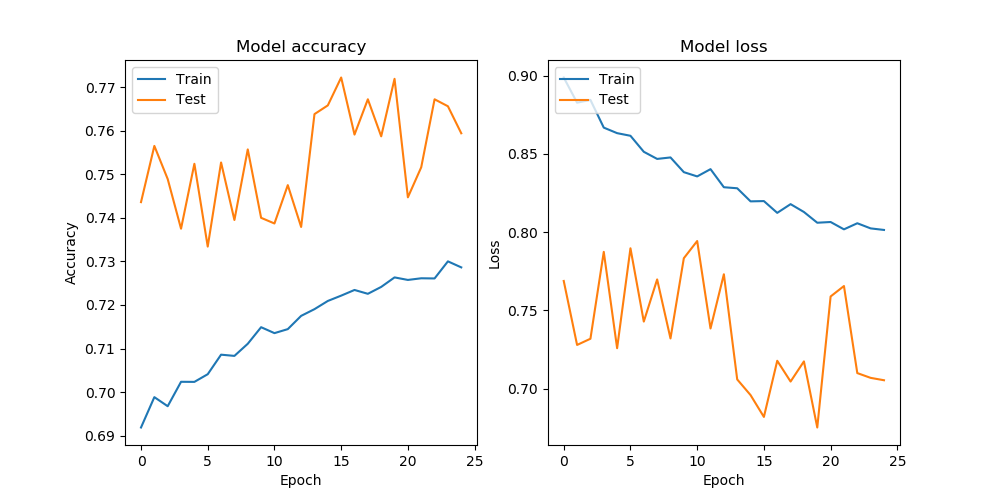

In [29]:
pltoutput = plotmetrics(history)
display(pltoutput)